In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import os

In [3]:
os.getcwd()

'C:\\Users\\manob\\Desktop'

In [2]:
# Reading and Dropping columns we don't need
df = pd.read_csv("movies.csv")
df.drop(labels=['rating', 'genre', 'released', 'director','writer','star','country','company'], axis=1,  inplace =True)
df.dropna(inplace=True)

In [3]:
#viewing the dataset
# Clustering should have fully numeric data

df

,name,year,score,votes,budget,gross,runtime
0,The Shining,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,The Blue Lagoon,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,1200000.0,18000000.0,538375067.0,124.0
3,Airplane!,1980,7.7,221000.0,3500000.0,83453539.0,88.0
4,Caddyshack,1980,7.3,108000.0,6000000.0,39846344.0,98.0
...,...,...,...,...,...,...,...
7648,Bad Boys for Life,2020,6.6,140000.0,90000000.0,426505244.0,124.0
7649,Sonic the Hedgehog,2020,6.5,102000.0,85000000.0,319715683.0,99.0
7650,Dolittle,2020,5.6,53000.0,175000000.0,245487753.0,101.0
7651,The Call of the Wild,2020,6.8,42000.0,135000000.0,111105497.0,100.0


In [4]:
# Copying data frame and performing min max scaling
df1=df
df1.drop(labels=['name'], axis =1, inplace=True)
scale = MinMaxScaler()

In [5]:
# Min max Scaling
df1_scaled = scale.fit_transform(df1)

In [142]:
# Final Numeric Data with columns
df1_numeric_scaled = pd.DataFrame(df1_scaled, index=df1.index, columns= df1.columns)
df1_numeric_scaled

,year,score,votes,budget,gross,runtime
0,0.0,0.878378,0.386200,0.053355,0.016507,0.399038
1,0.0,0.527027,0.027004,0.012624,0.020670,0.197115
2,0.0,0.918919,0.499959,0.050546,0.189086,0.293269
3,0.0,0.783784,0.092010,0.009815,0.029310,0.120192
4,0.0,0.729730,0.044922,0.016837,0.013995,0.168269
...,...,...,...,...,...,...
7648,1.0,0.635135,0.058257,0.252796,0.149796,0.293269
7649,1.0,0.621622,0.042422,0.238751,0.112289,0.173077
7650,1.0,0.500000,0.022004,0.491564,0.086219,0.182692
7651,1.0,0.662162,0.017420,0.379203,0.039022,0.177885


In [7]:
# Applying K-means
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1_numeric_scaled)
    distortions.append(kmeanModel.inertia_)

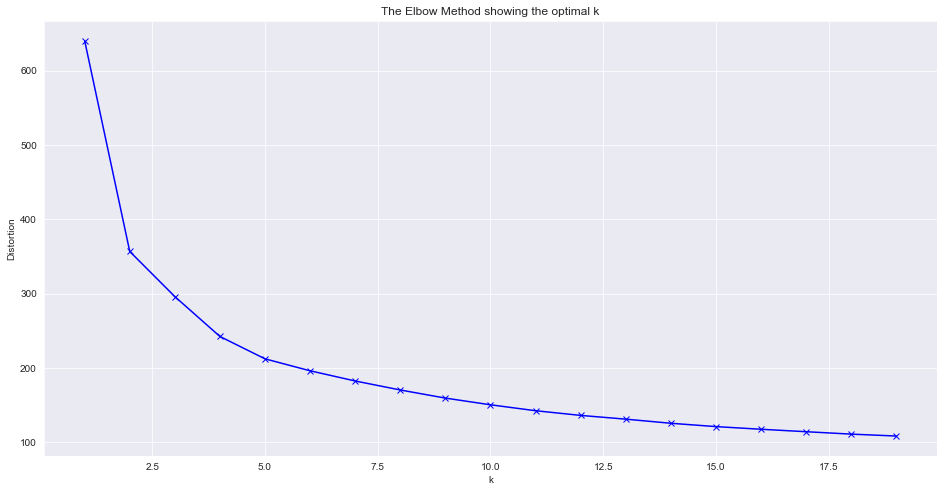

In [8]:
# Plotting elbow graph
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
# K values are 2, 3 and 5

# Kmeans for K = 2
kmeans2 = KMeans(n_clusters=2, max_iter= 100)
kmeans2.fit(df1_numeric_scaled)
labels2 = kmeans2.predict(df1_numeric_scaled)
print(labels2)

[0 0 0 ... 1 1 1]


In [10]:
# Reading in Data again ( For some reason original df was not adding cluster column)
df3 = pd.read_csv("movies.csv")
df3.drop(labels=['rating', 'genre', 'released', 'director','writer','star','country','company'], axis=1,  inplace =True)
df3.dropna(inplace=True)

In [11]:
# Adding cluster column , This column contains cluster labels
df3['cluster'] = kmeans2.labels_
df_kmeans2 =df3
# view clustered data
df_kmeans2

,name,year,score,votes,budget,gross,runtime,cluster
0,The Shining,1980,8.4,927000.0,19000000.0,46998772.0,146.0,0
1,The Blue Lagoon,1980,5.8,65000.0,4500000.0,58853106.0,104.0,0
2,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,1200000.0,18000000.0,538375067.0,124.0,0
3,Airplane!,1980,7.7,221000.0,3500000.0,83453539.0,88.0,0
4,Caddyshack,1980,7.3,108000.0,6000000.0,39846344.0,98.0,0
...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,2020,6.6,140000.0,90000000.0,426505244.0,124.0,1
7649,Sonic the Hedgehog,2020,6.5,102000.0,85000000.0,319715683.0,99.0,1
7650,Dolittle,2020,5.6,53000.0,175000000.0,245487753.0,101.0,1
7651,The Call of the Wild,2020,6.8,42000.0,135000000.0,111105497.0,100.0,1


In [12]:
# Selecting cluster 0 and cluster 1 columns
# Can also do
#labels_0 =df1_numeric_scaled[labels2 ==0]
#labels_1 =df1_numeric_scaled[labels2 ==1]
label_0 = df_kmeans2[df_kmeans2['cluster'] == 0]
label_1 = df_kmeans2[df_kmeans2['cluster'] == 1]

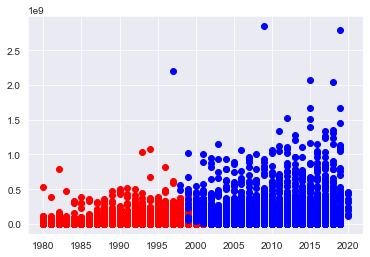

In [13]:
#Plotting clusters
plt.scatter(label_0['year'], label_0['gross'], color = 'red')
plt.scatter(label_1['year'], label_1['gross'], color = 'blue')
plt.show()

In [14]:
# For K=3
kmeans3 = KMeans(n_clusters=3, max_iter= 100)
kmeans3.fit(df1_numeric_scaled)
labels3 = kmeans2.predict(df1_numeric_scaled)
print(labels3)

[0 0 0 ... 1 1 1]


In [15]:
# Adding cluster column , This column contains cluster labels
df3['cluster'] = kmeans3.labels_
df_kmeans3 =df3
# view clustered data
df_kmeans3

,name,year,score,votes,budget,gross,runtime,cluster
0,The Shining,1980,8.4,927000.0,19000000.0,46998772.0,146.0,1
1,The Blue Lagoon,1980,5.8,65000.0,4500000.0,58853106.0,104.0,1
2,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,1200000.0,18000000.0,538375067.0,124.0,1
3,Airplane!,1980,7.7,221000.0,3500000.0,83453539.0,88.0,1
4,Caddyshack,1980,7.3,108000.0,6000000.0,39846344.0,98.0,1
...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,2020,6.6,140000.0,90000000.0,426505244.0,124.0,0
7649,Sonic the Hedgehog,2020,6.5,102000.0,85000000.0,319715683.0,99.0,0
7650,Dolittle,2020,5.6,53000.0,175000000.0,245487753.0,101.0,0
7651,The Call of the Wild,2020,6.8,42000.0,135000000.0,111105497.0,100.0,0


In [16]:
# Selecting cluster 0, cluster 1 and cluster 2 columns
# Can also do
#labels_0 =df1_numeric_scaled[labels2 ==0]
#labels_1 =df1_numeric_scaled[labels2 ==1]
#labels_2 =df1_numeric_scaled[labels2 ==2]
label_0 = df_kmeans3[df_kmeans3['cluster'] == 0]
label_1 = df_kmeans3[df_kmeans3['cluster'] == 1]
label_2 = df_kmeans3[df_kmeans3['cluster'] == 2]

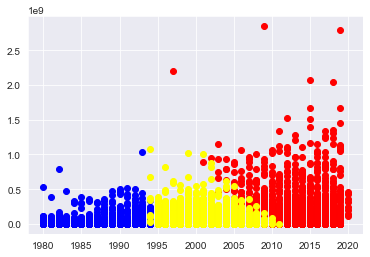

In [17]:
#Plotting
plt.scatter(label_0['year'], label_0['gross'], color = 'red')
plt.scatter(label_1['year'], label_1['gross'], color = 'blue')
plt.scatter(label_2['year'], label_2['gross'], color = 'yellow')
plt.show()

In [18]:
# For k =5
Kmeans5 = KMeans(n_clusters=5, max_iter=100)
Kmeans5.fit(df1_numeric_scaled)
labels5 = Kmeans5.predict(df1_numeric_scaled)
print(labels5)

[0 0 0 ... 3 3 2]


In [19]:
# Adding cluster column , This column contains cluster labels
df3['cluster']= Kmeans5.labels_
Kmeans5 = df3
# view clustered data
Kmeans5

,name,year,score,votes,budget,gross,runtime,cluster
0,The Shining,1980,8.4,927000.0,19000000.0,46998772.0,146.0,0
1,The Blue Lagoon,1980,5.8,65000.0,4500000.0,58853106.0,104.0,0
2,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,1200000.0,18000000.0,538375067.0,124.0,0
3,Airplane!,1980,7.7,221000.0,3500000.0,83453539.0,88.0,0
4,Caddyshack,1980,7.3,108000.0,6000000.0,39846344.0,98.0,0
...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,2020,6.6,140000.0,90000000.0,426505244.0,124.0,2
7649,Sonic the Hedgehog,2020,6.5,102000.0,85000000.0,319715683.0,99.0,2
7650,Dolittle,2020,5.6,53000.0,175000000.0,245487753.0,101.0,3
7651,The Call of the Wild,2020,6.8,42000.0,135000000.0,111105497.0,100.0,3


In [20]:
# Selecting clusters 1, 2, 3 ,4 ,5 rows

label_0 = Kmeans5[Kmeans5['cluster'] == 0]
label_1 = Kmeans5[Kmeans5['cluster'] == 1]
label_2 = Kmeans5[Kmeans5['cluster'] == 2]
label_3 = Kmeans5[Kmeans5['cluster'] == 3]
label_4 = Kmeans5[Kmeans5['cluster'] == 4]

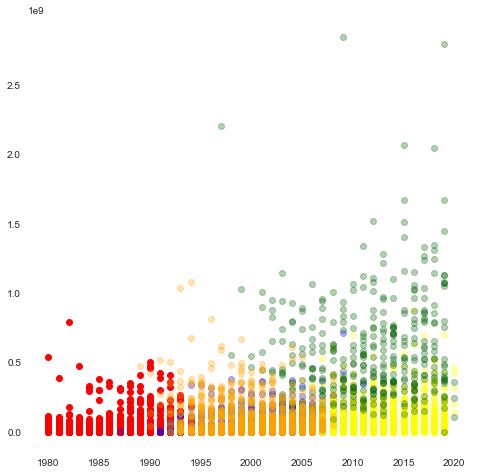

In [156]:
#Plotting clusters

plt.figure(figsize=(8, 8))
ax = plt.axes()
ax.set_facecolor("white")
plt.grid()
plt.scatter(label_0['year'], label_0['gross'], color = 'red',)
plt.scatter(label_1['year'], label_1['gross'], color = 'blue',alpha= 0.3)
plt.scatter(label_2['year'], label_2['gross'], color = 'yellow',alpha= 0.3)
plt.scatter(label_3['year'], label_3['gross'], color = 'darkgreen',alpha= 0.3)
plt.scatter(label_4['year'], label_4['gross'], color = 'orange',alpha= 0.3)

In [23]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Hierarchical clustering
linkagedf = df3
# Made dataframe smaller - Selected only top 100 rows
Hdf= linkagedf.iloc[0:100, 0:]

In [ ]:
#Using Min Max scaling to convert to numeric data for the top 1000 rows
Hdf_scaled = scale.fit_transform(Hdf)
Hdf_scaled_numeric = pd.DataFrame(Hdf_scaled, index=Hdf.index, columns= Hdf.columns)
Hdf_scaled_numeric

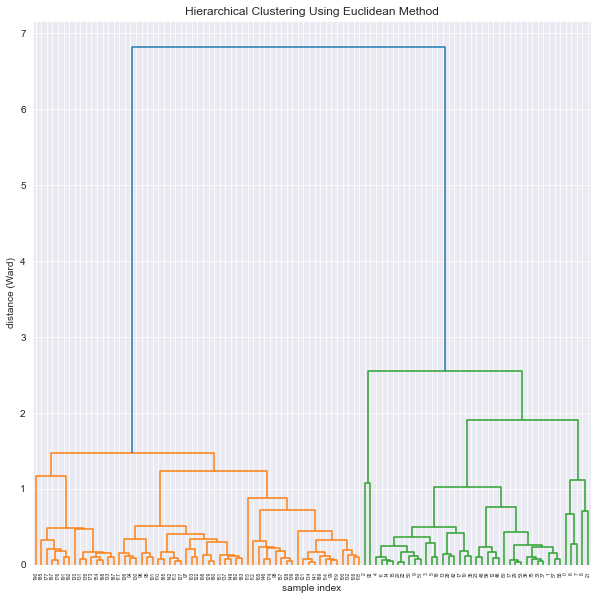

In [72]:
# Distance Metric:- Euclidean , method = "ward"
Hierarchical_eculidean = linkage(Hdf_scaled_numeric, method='ward', metric='euclidean')
dendrogram(Hierarchical_eculidean, labels=Hdf_scaled_numeric.index)
plt.title("Hierarchical Clustering Using Ward Method & Euclidean Distance")
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
plt.rcParams["figure.figsize"] = (8,8)

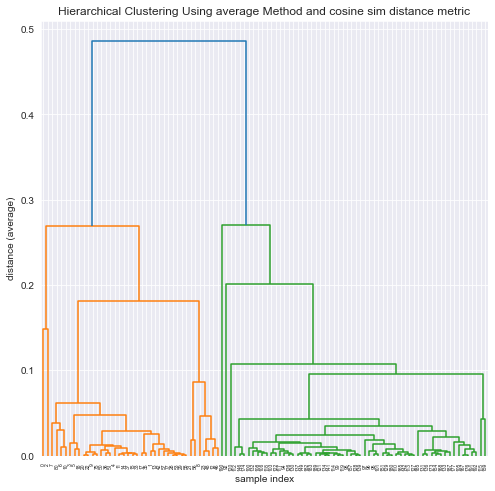

In [152]:
# Distance Metric :- Cosine Sim , Method = "average"
# Ward only works with eculidean
Hierarchical_cosine = linkage(Hdf_scaled_numeric, method='average', metric= 'cosine')
dendrogram(Hierarchical_cosine, labels=Hdf_scaled_numeric.index)
plt.title("Hierarchical Clustering Using average Method and cosine sim distance metric")
plt.xlabel('sample index')
plt.ylabel('distance (average)')
plt.rcParams["figure.figsize"] = (8,8)

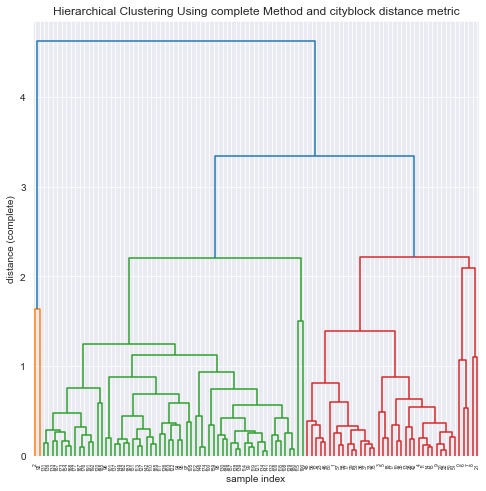

In [153]:
# Distance Metric :- cityblock , Method = "complete"
# distance.pdist to check various distance metrics available
Hierarchical_cityblock = linkage(Hdf_scaled_numeric, method='complete', metric= 'cityblock')
dendrogram(Hierarchical_cityblock, labels=Hdf_scaled_numeric.index)
plt.title("Hierarchical Clustering Using complete Method and cityblock distance metric")
plt.xlabel('sample index')
plt.ylabel('distance (complete)')
plt.rcParams["figure.figsize"] = (8,8)

In [145]:
a = df1_numeric_scaled
a.drop(labels =['score', 'votes', 'budget','gross'], axis =1 , inplace = True)

In [146]:
# DBSCAN :- Density-based spatial clustering of applications
from sklearn.cluster import DBSCAN
# For DBSCAN minimum points is 2* Number of dimensions
# We need optimal 'E' parameter. To determine that we need k- nearest neighbors
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5).fit(a)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(a)
sort_neigh_dist = np.sort(neigh_dist, axis=0)

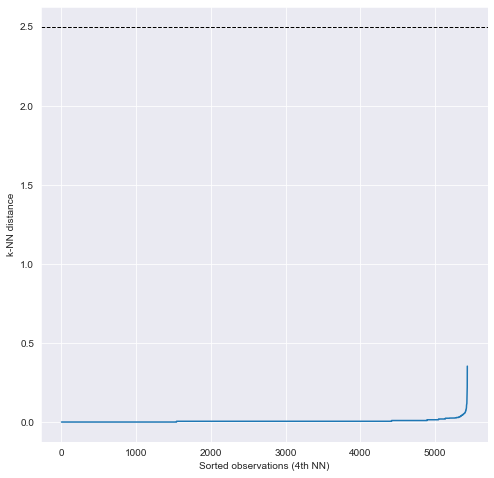

In [147]:
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [148]:
clusters = DBSCAN(eps=.1, min_samples=2, algorithm='ball_tree', metric='euclidean', leaf_size=90, p=2).fit(a)
from collections import Counter
Counter(clusters.labels_)

Counter({0: 5430, -1: 5})

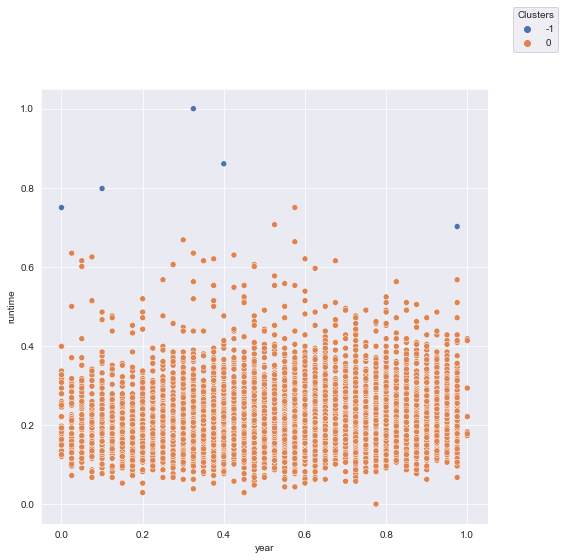

In [151]:
p = sns.scatterplot(data=a, x="year", y="runtime", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()